<a href="https://colab.research.google.com/github/zabolotnaydev-cloud/ML_internship/blob/main/logicregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/wine-quality-white-and-red.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df["type"].value_counts()

,count
type,
white,4898
red,1599


In [ ]:
df["type"] = df["type"].replace({"white": 0, "red":1})

/tmp/ipython-input-3922798211.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["type"] = df["type"].replace({"white": 0, "red":1})


In [ ]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
df.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.486740,0.653036,-0.187397,-0.348821,0.512678,-0.471644,-0.700357,0.390645,0.329129,0.487218,-0.032970,-0.119323
fixed acidity,0.486740,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.653036,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,-0.187397,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.348821,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.512678,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.471644,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.700357,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.390645,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,0.329129,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506


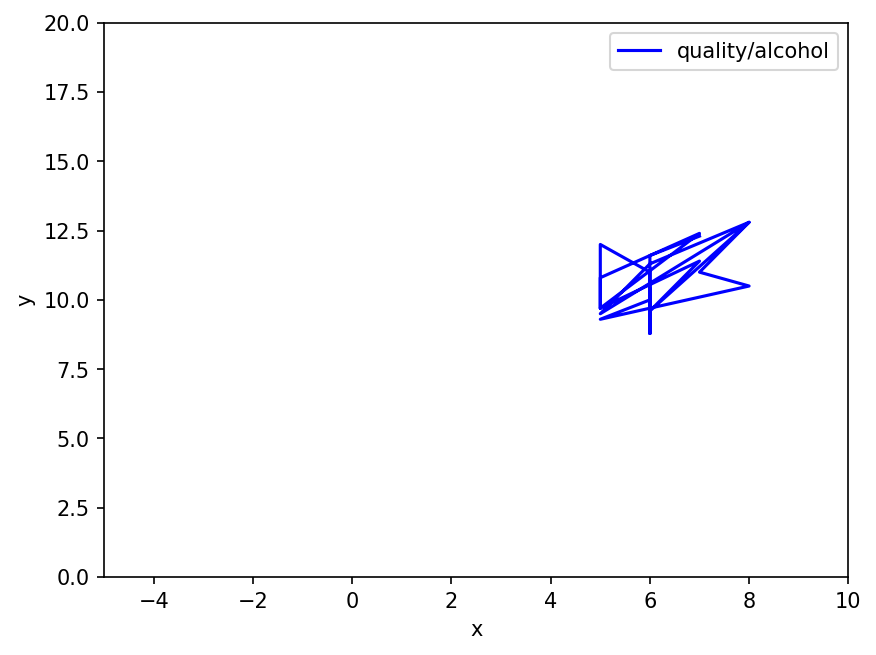

In [ ]:
plt.figure(dpi=150)
x = df["quality"][:30]
y = df["alcohol"][:30]
plt.xlim([-5, 10])
plt.ylim([0, 20])
plt.plot(x, y, label="quality/alcohol", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
corr = df.corr()["quality"].sort_values(ascending=False)
high_corr = corr[abs(corr)>0.2]
high_corr

,quality
quality,1.000000
alcohol,0.444319
chlorides,-0.200666
volatile acidity,-0.265699
density,-0.305858


In [ ]:
x = df.drop('quality', axis = 1)
y = df["quality"]
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [ ]:
high_corr_indexes = high_corr.index.tolist()
x2 = df[high_corr_indexes].drop('quality', axis=1)
y2 = df["quality"]
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
# import sklearn.metrics as metrics

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
lr_sklearn = accuracy_score(y_test, prediction)
lr_sklearn

0.47923076923076924

In [ ]:
from sklearn.preprocessing import StandardScaler

class LogisticRegression_s:
    def __init__(self, lr=0.0003, epochs=500):  # Написано не через макс итерации , а через конкретное число
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y, verbose=True):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for epoch in range(self.epochs):
            linear = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(linear)

            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.sum(y_pred - y) / n_samples

            self.w -= self.lr * dw
            self.b -= self.lr * db

            if verbose and epoch % 100 == 0:
                loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, X):
        linear = np.dot(X, self.w) + self.b
        y_pred = self.sigmoid(linear)
        return (y_pred >= 0.5).astype(int)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model = LogisticRegression_s(lr=0.01, epochs=1000)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

Epoch 0, Loss: 0.6931
Epoch 100, Loss: -24.1711
Epoch 200, Loss: -47.7139
Epoch 300, Loss: -71.2387
Epoch 400, Loss: -94.7631
Epoch 500, Loss: -118.2604
Epoch 600, Loss: -139.8309
Epoch 700, Loss: -154.1018
Epoch 800, Loss: -161.6551
Epoch 900, Loss: -164.7598


In [ ]:
lr2 = LogisticRegression_s()
lr2.fit(x_train, y_train)
prediction2 = lr2.predict(x_test)

Epoch 0, Loss: 0.6931
Epoch 100, Loss: -166.4002
Epoch 200, Loss: -166.4002
Epoch 300, Loss: -166.4002
Epoch 400, Loss: -166.4002
Epoch 500, Loss: -166.4002
Epoch 600, Loss: -166.4002
Epoch 700, Loss: -166.4002
Epoch 800, Loss: -166.4002
Epoch 900, Loss: -166.4002


In [ ]:
lr_from_scratch = accuracy_score(y_test, prediction2)

In [ ]:
lr_sklearn, lr_from_scratch

(0.47923076923076924, 0.0)

In [ ]:
# другой датасет с корр
lr_c = LogisticRegression()
lr_c.fit(x_train2, y_train2)
a = lr_c.predict(x_test2)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
lr_c_s = LogisticRegression_s()
lr_c_s.fit(x_train2, y_train2)
lr_c_s.predict(x_test2)

Epoch 0, Loss: 0.6931
Epoch 100, Loss: -166.4002
Epoch 200, Loss: -166.4002
Epoch 300, Loss: -166.4002
Epoch 400, Loss: -166.4002
Epoch 500, Loss: -166.4002
Epoch 600, Loss: -166.4002
Epoch 700, Loss: -166.4002
Epoch 800, Loss: -166.4002
Epoch 900, Loss: -166.4002


array([1, 1, 1, ..., 1, 1, 1])